<h1 align="center"> Part 2: Time Series Price and Volume Variation by Day, Month, and Year</h1>

This code demonstrates how to view time series data in pandas as well as shifting dataframe, groupby month, and price variation by day, month, year etc.  

**if this tutorial doesn't cover what you are looking for, please leave a comment on the youtube video and I will try to cover what you are interested in.**

<b> Part 1 </b>: https://www.youtube.com/watch?v=OwnaUVt6VVE

<h3 align='Left'> Importing Libraries</h3>

In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h3 align='Left'> Getting Data and Viewing with Pandas </h3>

In [2]:
# https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
google = web.DataReader('GOOG', data_source = 'google', start = '3/14/2009', end = '4/14/2016')
google.head()

Open    High     Low   Close  Volume
Date                                              
2009-03-16  162.83  164.70  159.14  159.69     NaN
2009-03-17  159.93  167.50  159.39  167.50     NaN
2009-03-18  167.24  169.83  163.86  166.38     NaN
2009-03-19  165.67  167.83  163.53  164.81     NaN
2009-03-20  164.98  166.33  163.01  164.91     NaN

<h3 align='Left'> Calculate Daily Price Variation </h3>
<br> Daily price variation of a stock is the difference between the highest and lowest values on a given trading day. 

In [3]:
daily_shift = (google['High'] - google['Low'])
daily_shift = pd.DataFrame(data = daily_shift, columns = ['Daily Price Variation'])
daily_shift.head()

Daily Price Variation
Date                             
2009-03-16                   5.56
2009-03-17                   8.11
2009-03-18                   5.97
2009-03-19                   4.30
2009-03-20                   3.32

<h3 align='Left'> Calculate Daily Price Variation </h3>

Daily price variation may also refer to the difference between one day's opening price and the next day's opening price. 

This is according to: http://finance.zacks.com/calculate-daily-price-variation-stocks-8299.html

In [4]:
# Notice that the first output is a nan because shift moves 
# the original dataframe down by one index
google['Open'].shift(1).head()

Date
2009-03-16       NaN
2009-03-17    162.83
2009-03-18    159.93
2009-03-19    167.24
2009-03-20    165.67
Name: Open, dtype: float64

In [5]:
ndaily_shift = (google['Open'] - google['Open'].shift(1))
ndaily_shift = pd.DataFrame(data = ndaily_shift)
ndaily_shift.columns = ['Daily Price Variation'] # renaming column
ndaily_shift.head()

Daily Price Variation
Date                             
2009-03-16                    NaN
2009-03-17                  -2.90
2009-03-18                   7.31
2009-03-19                  -1.57
2009-03-20                  -0.69

In [6]:
# Removing indexes with nan
ndaily_shift = ndaily_shift.dropna()
ndaily_shift.head()

Daily Price Variation
Date                             
2009-03-17                  -2.90
2009-03-18                   7.31
2009-03-19                  -1.57
2009-03-20                  -0.69
2009-03-23                   1.63

<h3 align='Left'> Calculate Monthly Price Variation</h3>

In [7]:
# find price max in a given month
google.groupby(pd.TimeGrouper(freq='M')).max().head()

Open    High     Low   Close  Volume
Date                                              
2009-03-31  176.39  179.40  174.08  176.47     NaN
2009-04-30  197.68  201.67  197.20  197.79     NaN
2009-05-31  205.85  208.41  205.14  208.41     NaN
2009-06-30  222.31  223.45  219.51  221.94     NaN
2009-07-31  224.77  226.12  221.08  223.14     NaN

In [8]:
# find price min in a given month
google.groupby(pd.TimeGrouper(freq='M')).min().head()

Open    High     Low   Close  Volume
Date                                              
2009-03-31  159.93  164.70  159.14  159.69     NaN
2009-04-30  171.72  177.44  170.13  176.87     NaN
2009-05-31  194.21  195.91  192.15  193.56     NaN
2009-06-30  203.12  204.29  200.74  202.64     NaN
2009-07-31  199.80  202.80  197.79  198.12     NaN

In [9]:
month_groupby = google.groupby(pd.TimeGrouper(freq='M'))
month_difference = (month_groupby['Open'].max() - month_groupby['Open'].min())
month_difference = pd.DataFrame(data = month_difference)
month_difference.columns = ['Monthly Price Variation']
month_difference.head()

Monthly Price Variation
Date                               
2009-03-31                    16.46
2009-04-30                    25.96
2009-05-31                    11.64
2009-06-30                    19.19
2009-07-31                    24.97

In [10]:
year_groupby = google.groupby(pd.TimeGrouper(freq='A'))
year_difference = (year_groupby['Open'].max() - year_groupby['Open'].min())
year_difference = pd.DataFrame(data = year_difference)
year_difference.columns = ['Yearly Price Variation']
year_difference.head()

Yearly Price Variation
Date                              
2009-12-31                  152.13
2010-12-31                   95.74
2011-12-31                   84.25
2012-12-31                  105.08
2013-12-31                  207.63

<h3 align='Left'> Volume by Year </h3>

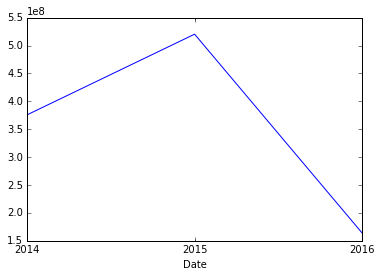

In [19]:
# Annual time grouper ('A'). We could also use monthly (M), quarterly (Q), or weekly (W).
#google.groupby(pd.TimeGrouper(freq='M'))
year_volume = google['Volume'].groupby(pd.TimeGrouper(freq='A')).sum().dropna()
year_volume = pd.DataFrame(data = year_volume)
year_volume = year_volume.reset_index()
year_volume.plot('Date', 'Volume', legend = None);

<h3 align='Left'> Volume by Month </h3>

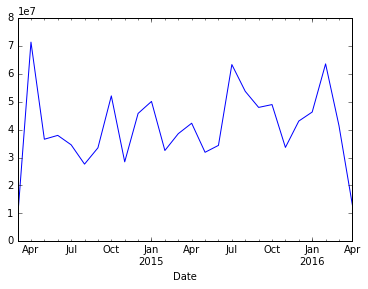

In [17]:
# Annual time grouper ('A'). We could also use monthly (M), quarterly (Q), or weekly (W).
#google.groupby(pd.TimeGrouper(freq='M'))
month_volume = google['Volume'].groupby(pd.TimeGrouper(freq='M')).sum().dropna()
month_volume = pd.DataFrame(data = month_volume)
month_volume = month_volume.reset_index()
month_volume.plot('Date', 'Volume', legend = None);

<h3 align='Left'> Plotting Price Variation by Day, Month, Year </h3>

In [12]:
# making a Date Column
google = google.reset_index()
daily_shift = daily_shift.reset_index()
month_difference = month_difference.reset_index()
year_difference = year_difference.reset_index()
google.head()

Date    Open    High     Low   Close  Volume
0 2009-03-16  162.83  164.70  159.14  159.69     NaN
1 2009-03-17  159.93  167.50  159.39  167.50     NaN
2 2009-03-18  167.24  169.83  163.86  166.38     NaN
3 2009-03-19  165.67  167.83  163.53  164.81     NaN
4 2009-03-20  164.98  166.33  163.01  164.91     NaN

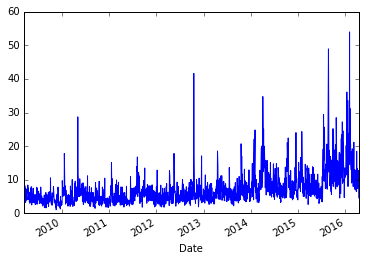

In [13]:
daily_shift.plot('Date', 'Daily Price Variation', legend = None);

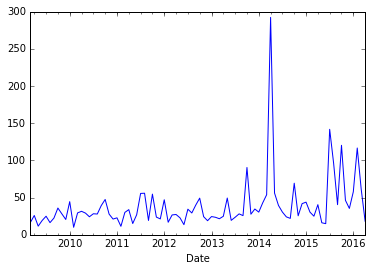

In [14]:
month_difference.plot('Date', 'Monthly Price Variation', legend=None);

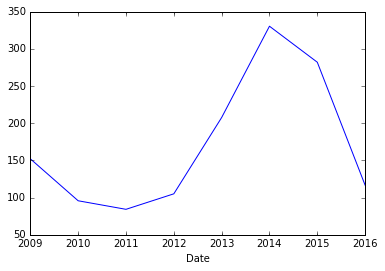

In [15]:
year_difference.plot('Date', 'Yearly Price Variation', legend = None);

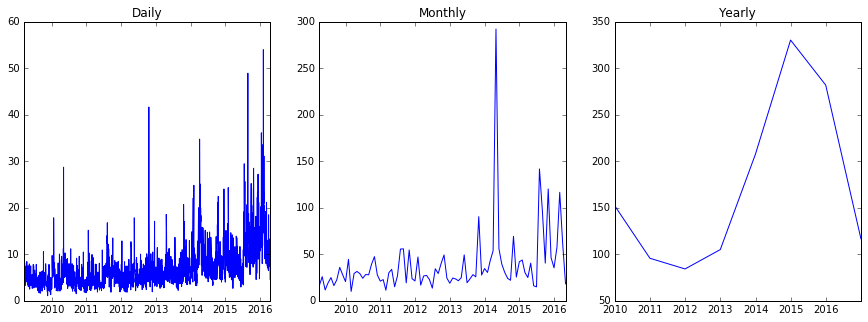

In [18]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5));
axes[0].plot('Date', 'Daily Price Variation', data = daily_shift);
axes[0].set_title('Daily');
axes[1].plot('Date', 'Monthly Price Variation', data = month_difference);
axes[1].set_title('Monthly');
axes[2].plot('Date', 'Yearly Price Variation', data = year_difference);
axes[2].set_title('Yearly');